# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional,Conv1D,MaxPooling1D,Flatten,BatchNormalization
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,classification_report
from tensorflow.keras.optimizers import Adam
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB  # Import BernoulliNB

#Load the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/csv_data.csv')

# Drop rows with label 0 (malicious) to balance the dataset

In [ ]:
rows_to_drop = df[df['Label'] == 0].index[:1333]
df = df.drop(rows_to_drop).reset_index(drop=True)

# Drop 'Flow ID' column

In [ ]:
df = df.drop(['Flow ID'], axis=1)

# Split the data into features (x) and labels (y)

In [ ]:
x = df.drop(['Label'], axis=1)
y = df['Label']

# Standardize features

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ***#NITHISH Implemented Models***

#LSTM Model

In [ ]:
# Reshape the data for LSTM input (samples, time steps, features)
lstm_x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
lstm_x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(lstm_x_train.shape[1], lstm_x_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(lstm_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Generate predictions from the LSTM model
lstm_preds = (lstm_model.predict(lstm_x_test) > 0.5).astype("int32")

lstm_accuracy = accuracy_score(y_test, lstm_preds)*100
lstm_precision = precision_score(y_test,lstm_preds)*100;
lstm_recall = recall_score(y_test,lstm_preds)*100;
lstm_f1_score = f1_score(y_test,lstm_preds)*100;


print("Accuracy   : ",lstm_accuracy)
print("Precision  : ",lstm_precision)
print("Recall     : ",lstm_recall)
print("F1 Score   : ",lstm_f1_score)


Epoch 1/10
319/319 [==============================] - 4s 6ms/step - loss: 0.4388 - accuracy: 0.7826 - val_loss: 0.3763 - val_accuracy: 0.8166
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8264 - val_loss: 0.3088 - val_accuracy: 0.8563
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2727 - accuracy: 0.8466 - val_loss: 0.2493 - val_accuracy: 0.8708
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2224 - accuracy: 0.8972 - val_loss: 0.2017 - val_accuracy: 0.9199
Epoch 5/10
319/319 [==============================] - 1s 4ms/step - loss: 0.1837 - accuracy: 0.9162 - val_loss: 0.1704 - val_accuracy: 0.9301
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.1604 - accuracy: 0.9269 - val_loss: 0.1536 - val_accuracy: 0.9336
Epoch 7/10
319/319 [==============================] - 2s 7ms/step - loss: 0.1501 - accuracy: 0.9273 - val_loss: 0.1498 - val_accuracy: 0.9321
Epoch 

#Bi-LSTM Model

In [ ]:
# Reshape the data for Bi-LSTM input (samples, time steps, features)
bi_lstm_x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
bi_lstm_x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

# Build the Bi-LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(bi_lstm_x_train.shape[1], bi_lstm_x_train.shape[2])))
bi_lstm_model.add(Bidirectional(LSTM(64)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
bi_lstm_model.fit(bi_lstm_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Generate predictions from the Bi-LSTM model
bi_lstm_preds = (bi_lstm_model.predict(bi_lstm_x_test) > 0.5).astype("int32")

bi_lstm_accuracy = accuracy_score(y_test, bi_lstm_preds)*100
bi_lstm_precision = precision_score(y_test,bi_lstm_preds)*100;
bi_lstm_recall = recall_score(y_test,bi_lstm_preds)*100;
bi_lstm_f1_score = f1_score(y_test,bi_lstm_preds)*100;

print("Accuracy   : ",bi_lstm_accuracy)
print("Precision  : ",bi_lstm_precision)
print("Recall     : ",bi_lstm_recall)
print("F1 Score   : ",bi_lstm_f1_score)

Epoch 1/10
319/319 [==============================] - 13s 18ms/step - loss: 0.3694 - accuracy: 0.8192 - val_loss: 0.2747 - val_accuracy: 0.8559
Epoch 2/10
319/319 [==============================] - 4s 11ms/step - loss: 0.1987 - accuracy: 0.9045 - val_loss: 0.1464 - val_accuracy: 0.9262
Epoch 3/10
319/319 [==============================] - 3s 10ms/step - loss: 0.1415 - accuracy: 0.9272 - val_loss: 0.1455 - val_accuracy: 0.9101
Epoch 4/10
319/319 [==============================] - 3s 10ms/step - loss: 0.1323 - accuracy: 0.9288 - val_loss: 0.1349 - val_accuracy: 0.9344
Epoch 5/10
319/319 [==============================] - 4s 14ms/step - loss: 0.1279 - accuracy: 0.9310 - val_loss: 0.1346 - val_accuracy: 0.9340
Epoch 6/10
319/319 [==============================] - 4s 12ms/step - loss: 0.1247 - accuracy: 0.9302 - val_loss: 0.1326 - val_accuracy: 0.9352
Epoch 7/10
319/319 [==============================] - 3s 10ms/step - loss: 0.1211 - accuracy: 0.9313 - val_loss: 0.1346 - val_accuracy: 0.931

#Stacked LSTM Model

In [ ]:
# Reshape the data for Stacked LSTM input (samples, time steps, features)
stacked_lstm_x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
stacked_lstm_x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

# Build the Stacked LSTM model
stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(128, return_sequences=True, input_shape=(stacked_lstm_x_train.shape[1], stacked_lstm_x_train.shape[2])))
stacked_lstm_model.add(LSTM(64, return_sequences=True))
stacked_lstm_model.add(LSTM(32))
stacked_lstm_model.add(Dropout(0.2))
stacked_lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
stacked_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
stacked_lstm_model.fit(stacked_lstm_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Generate predictions from the Stacked LSTM model
stacked_lstm_preds = (stacked_lstm_model.predict(stacked_lstm_x_test) > 0.5).astype("int32")


stacked_lstm_accuracy = accuracy_score(y_test, stacked_lstm_preds)*100
stacked_lstm_precision = precision_score(y_test,stacked_lstm_preds)*100;
stacked_lstm_recall = recall_score(y_test,stacked_lstm_preds)*100;
stacked_lstm_f1_score = f1_score(y_test,stacked_lstm_preds)*100;

print("Accuracy   : ",stacked_lstm_accuracy)
print("Precision  : ",stacked_lstm_precision)
print("Recall     : ",stacked_lstm_recall)
print("F1 Score   : ",stacked_lstm_f1_score)

Epoch 1/10
319/319 [==============================] - 10s 10ms/step - loss: 0.4131 - accuracy: 0.8218 - val_loss: 0.2990 - val_accuracy: 0.8312
Epoch 2/10
319/319 [==============================] - 2s 7ms/step - loss: 0.2213 - accuracy: 0.8846 - val_loss: 0.1378 - val_accuracy: 0.9187
Epoch 3/10
319/319 [==============================] - 2s 7ms/step - loss: 0.1406 - accuracy: 0.9170 - val_loss: 0.1302 - val_accuracy: 0.9203
Epoch 4/10
319/319 [==============================] - 3s 9ms/step - loss: 0.1345 - accuracy: 0.9210 - val_loss: 0.1284 - val_accuracy: 0.9285
Epoch 5/10
319/319 [==============================] - 3s 10ms/step - loss: 0.1313 - accuracy: 0.9278 - val_loss: 0.1278 - val_accuracy: 0.9289
Epoch 6/10
319/319 [==============================] - 2s 7ms/step - loss: 0.1305 - accuracy: 0.9318 - val_loss: 0.1246 - val_accuracy: 0.9344
Epoch 7/10
319/319 [==============================] - 2s 7ms/step - loss: 0.1292 - accuracy: 0.9326 - val_loss: 0.1250 - val_accuracy: 0.9344
Epo

#1D-CNN

In [ ]:
# Reshape the data for 1D CNN input (samples, time steps, features)
cnn_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
cnn_x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build the 1D CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(cnn_x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(cnn_x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
cnn_preds = (cnn_model.predict(cnn_x_test) > 0.5).astype("int32")


cnn_accuracy = accuracy_score(y_test, cnn_preds)*100
cnn_precision = precision_score(y_test,cnn_preds)*100;
cnn_recall = recall_score(y_test,cnn_preds)*100;
cnn_f1_score = f1_score(y_test,cnn_preds)*100;


print("Accuracy   : ",cnn_accuracy)
print("Precision  : ",cnn_precision)
print("Recall     : ",cnn_recall)
print("F1 Score   : ",cnn_f1_score)

Epoch 1/20
160/160 [==============================] - 2s 6ms/step - loss: 0.2367 - accuracy: 0.8999 - val_loss: 0.3999 - val_accuracy: 0.9336
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.1722 - accuracy: 0.9197 - val_loss: 0.2526 - val_accuracy: 0.9329
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1600 - accuracy: 0.9209 - val_loss: 0.1701 - val_accuracy: 0.9352
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.1556 - accuracy: 0.9197 - val_loss: 0.1492 - val_accuracy: 0.9340
Epoch 5/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1495 - accuracy: 0.9207 - val_loss: 0.1836 - val_accuracy: 0.9352
Epoch 6/20
160/160 [==============================] - 1s 6ms/step - loss: 0.1436 - accuracy: 0.9224 - val_loss: 0.1486 - val_accuracy: 0.9348
Epoch 7/20
160/160 [==============================] - 1s 5ms/step - loss: 0.1404 - accuracy: 0.9255 - val_loss: 0.1566 - val_accuracy: 0.9340
Epoch 

#Quadratic Discriminant Analysis

In [ ]:
# Build the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(x_train, y_train)

# Make predictions on the test data
qda_preds = (qda.predict(x_test) > 0.5).astype("int32")


qda_accuracy = accuracy_score(y_test, qda_preds)*100
qda_precision = precision_score(y_test,qda_preds)*100;
qda_recall = recall_score(y_test,qda_preds)*100;
qda_f1_score = f1_score(y_test,qda_preds)*100;


print("Accuracy   : ",qda_accuracy)
print("Precision  : ",qda_precision)
print("Recall     : ",qda_recall)
print("F1 Score   : ",qda_f1_score)

Accuracy   :  77.10427135678391
Precision  :  92.123629112662
Recall     :  58.70393900889454
F1 Score   :  71.71129220023282


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# ***#PRATHAM Implemented Models***

#Logistic Regression

In [ ]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(x_train, y_train)

lg_preds = lg_model.predict(x_test)

lg_accuracy = accuracy_score(y_test, lg_preds)*100
lg_precision = precision_score(y_test,lg_preds)*100;
lg_recall = recall_score(y_test,lg_preds)*100;
lg_f1_score = f1_score(y_test,lg_preds)*100;

print("Accuracy   : ",lg_accuracy)
print("Precision  : ",lg_precision)
print("Recall     : ",lg_recall)
print("F1 Score   : ",lg_f1_score)

Accuracy   :  83.00879396984925
Precision  :  84.87508440243079
Recall     :  79.86022871664548
F1 Score   :  82.29132569558101


#KNN

In [ ]:
# Calculate error rate for different values of n_neighbors
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
req_k_value = error_rate.index(min(error_rate)) + 1

knn_classifier = KNeighborsClassifier(n_neighbors=req_k_value)
knn_classifier.fit(x_train, y_train)

knn_classifier_preds = knn_classifier.predict(x_test)


knn_accuracy = accuracy_score(y_test, knn_classifier_preds)*100
knn_precision = precision_score(y_test,knn_classifier_preds)*100;
knn_recall = recall_score(y_test,knn_classifier_preds)*100;
knn_f1_score = f1_score(y_test,knn_classifier_preds)*100;

print("Accuracy   : ",knn_accuracy)
print("Precision  : ",knn_precision)
print("Recall     : ",knn_recall)
print("F1 Score   : ",knn_f1_score)

Accuracy   :  94.03266331658291
Precision  :  92.55842558425584
Recall     :  95.61626429479034
F1 Score   :  94.0625


#DFNN

In [ ]:
dfnn_model = keras.Sequential([
    layers.Input(shape=(17,)),  # Input layer with 2 features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

dfnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dfnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

dfnn_preds = dfnn_model.predict(x_test)
dfnn_preds = np.round(dfnn_preds).flatten()


dfnn_accuracy = accuracy_score(y_test, dfnn_preds)*100
dfnn_precision = precision_score(y_test,dfnn_preds)*100;
dfnn_recall = recall_score(y_test,dfnn_preds)*100;
dfnn_f1_score = f1_score(y_test,dfnn_preds)*100;

print("Accuracy   : ",dfnn_accuracy)
print("Precision  : ",dfnn_precision)
print("Recall     : ",dfnn_recall)
print("F1 Score   : ",dfnn_f1_score)

Epoch 1/10
319/319 [==============================] - 2s 3ms/step - loss: 0.3354 - accuracy: 0.8642 - val_loss: 0.2281 - val_accuracy: 0.9136
Epoch 2/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1776 - accuracy: 0.9225 - val_loss: 0.1757 - val_accuracy: 0.9372
Epoch 3/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9263 - val_loss: 0.1621 - val_accuracy: 0.9340
Epoch 4/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9297 - val_loss: 0.1578 - val_accuracy: 0.9340
Epoch 5/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9304 - val_loss: 0.1487 - val_accuracy: 0.9352
Epoch 6/10
319/319 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 0.9318 - val_loss: 0.1499 - val_accuracy: 0.9368
Epoch 7/10
319/319 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9328 - val_loss: 0.1511 - val_accuracy: 0.9348
Epoch 

#LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_preds = lda.predict(x_test)
lda_accuracy = accuracy_score(y_test,lda_preds)*100;

lda_accuracy = accuracy_score(y_test, lda_preds)*100
lda_precision = precision_score(y_test,lda_preds)*100;
lda_recall = recall_score(y_test,lda_preds)*100;
lda_f1_score = f1_score(y_test,lda_preds)*100;

print("Accuracy   : ",lda_accuracy)
print("Precision  : ",lda_precision)
print("Recall     : ",lda_recall)
print("F1 Score   : ",lda_f1_score)

Accuracy   :  84.70477386934674
Precision  :  85.96955658504302
Recall     :  82.52858958068614
F1 Score   :  84.21393841166936


# ***#MANAS Implemented Models***

#SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_class=SGDClassifier(loss='log',penalty='l1',max_iter=500,shuffle=False)
sgd_class.fit(x_train,y_train)
sgd_class_preds=sgd_class.predict(x_test)



acc_score_sgd = accuracy_score(y_test, sgd_class_preds)*100
precision_sgd = precision_score(y_test,sgd_class_preds)*100;
recall_sgd = recall_score(y_test,sgd_class_preds)*100;
f1_score_sgd = f1_score(y_test,sgd_class_preds)*100;


print("Accuracy   : ",acc_score_sgd)
print("Precision  : ",precision_sgd)
print("Recall     : ",recall_sgd)
print("F1 Score   : ",f1_score_sgd)

Accuracy   :  82.4748743718593
Precision  :  85.37604456824512
Recall     :  77.89072426937739
F1 Score   :  81.46179401993356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


#Ridge classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier=RidgeClassifier(alpha=0.01,fit_intercept=True,solver='lsqr') #fit intercept when data already centred
ridge_classifier.fit(x_train,y_train)
ridge_classifier_preds=ridge_classifier.predict(x_test)


acc_score_ridge = accuracy_score(y_test, ridge_classifier_preds)*100
precision_ridge = precision_score(y_test,ridge_classifier_preds)*100;
recall_ridge = recall_score(y_test,ridge_classifier_preds)*100;
f1_score_ridge = f1_score(y_test,ridge_classifier_preds)*100;


print("Accuracy   : ",acc_score_ridge)
print("Precision  : ",precision_ridge)
print("Recall     : ",recall_ridge)
print("F1 Score   : ",f1_score_ridge)


Accuracy   :  84.70477386934674
Precision  :  85.96955658504302
Recall     :  82.52858958068614
F1 Score   :  84.21393841166936


# Deep belief network

In [ ]:
dbn_model = Sequential()
dbn_model.add(Dense(128, activation='relu', input_shape=(17,)))
dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(32, activation='relu'))
dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(32, activation='relu'))
dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(32, activation='relu'))
dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(32, activation='relu'))
dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(32, activation='relu'))
# dbn_model.add(Dense(32, activation='sigmoid'))
dbn_model.add(Dense(1, activation='sigmoid'))
dbn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dbn_model.summary()

dbn_model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test))

dbn_model_preds = (dbn_model.predict(x_test) > 0.5).astype("int32")


dbn_accuracy = accuracy_score(y_test, dbn_model_preds)*100
dbn_precision = precision_score(y_test,dbn_model_preds)*100;
dbn_recall = recall_score(y_test,dbn_model_preds)*100;
dbn_f1_score = f1_score(y_test,dbn_model_preds)*100;


print("Accuracy   : ",dbn_accuracy)
print("Precision  : ",dbn_precision)
print("Recall     : ",dbn_recall)
print("F1 Score   : ",dbn_f1_score)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2304      
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)               

# auto encoders

In [ ]:
encoder = Sequential([
  Dense(128, activation="relu", input_shape=(17,)),
  Dense(64, activation="relu"),
  Dense(32, activation="relu")
])
decoder =Sequential([
  Dense(64, activation="relu", input_shape=(32,)),
  Dense(128, activation="relu"),
  Dense(17, activation="sigmoid")
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")


autoencoder.fit(x_train, x_train, epochs=5, batch_size=32)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

classifier = Sequential([
  Dense(16, activation="relu", input_shape=(32,)),
  Dense(1, activation="sigmoid")
])
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

classifier.fit(x_train_encoded, y_train, epochs=25, batch_size=32,validation_data=(x_test_encoded, y_test))

classifier_preds = (classifier.predict(x_test_encoded) > 0.5).astype("int32")


classifier_accuracy = accuracy_score(y_test, classifier_preds)*100
classifier_precision = precision_score(y_test,classifier_preds)*100;
classifier_recall = recall_score(y_test,classifier_preds)*100;
classifier_f1_score = f1_score(y_test,classifier_preds)*100;


print("Accuracy   : ",classifier_accuracy)
print("Precision  : ",classifier_precision)
print("Recall     : ",classifier_recall)
print("F1 Score   : ",classifier_f1_score)

Epoch 1/5
398/398 [==============================] - 6s 8ms/step - loss: -6113136.5000
Epoch 2/5
398/398 [==============================] - 2s 6ms/step - loss: -1441907072.0000
Epoch 3/5
398/398 [==============================] - 1s 4ms/step - loss: -26681911296.0000
Epoch 4/5
398/398 [==============================] - 2s 4ms/step - loss: -177385242624.0000
Epoch 5/5
100/100 [==============================] - 0s 1ms/step
Epoch 1/25
398/398 [==============================] - 2s 2ms/step - loss: 23638.4961 - accuracy: 0.7505 - val_loss: 1666.2227 - val_accuracy: 0.8182
Epoch 2/25
398/398 [==============================] - 1s 2ms/step - loss: 1250.1981 - accuracy: 0.7461 - val_loss: 285.3787 - val_accuracy: 0.7996
Epoch 3/25
398/398 [==============================] - 1s 3ms/step - loss: 1999.0536 - accuracy: 0.7469 - val_loss: 1234.3412 - val_accuracy: 0.8144
Epoch 4/25
398/398 [==============================] - 1s 3ms/step - loss: 1717.9393 - accuracy: 0.7458 - val_loss: 274.6144 - val_a

# ***#NEERAJ Implemented Models***

#Random Forest

In [ ]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=4)

# Train the model
rf_model.fit(x_train, y_train)

# Predict labels for the test set
rf_preds = rf_model.predict(x_test)


rf_accuracy = accuracy_score(y_test, rf_preds)*100
rf_precision = precision_score(y_test,rf_preds)*100;
rf_recall = recall_score(y_test,rf_preds)*100;
rf_f1_score = f1_score(y_test,rf_preds)*100;


print("Accuracy   : ",rf_accuracy)
print("Precision  : ",rf_precision)
print("Recall     : ",rf_recall)
print("F1 Score   : ",rf_f1_score)

Accuracy   :  94.53517587939699
Precision  :  93.91468005018821
Recall     :  95.10800508259211
F1 Score   :  94.50757575757575


#Bagging

In [ ]:
# Create a BaggingClassifier with DecisionTree as the base estimator
base_estimator = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=100, random_state=4)

# Train the model
bagging_classifier.fit(x_train, y_train)

# Make predictions on the test data
bagging_classifier_preds = bagging_classifier.predict(x_test)

bagging_classifier_accuracy = accuracy_score(y_test, bagging_classifier_preds)*100
bagging_classifier_precision = precision_score(y_test,bagging_classifier_preds)*100;
bagging_classifier_recall = recall_score(y_test,bagging_classifier_preds)*100;
bagging_classifier_f1_score = f1_score(y_test,bagging_classifier_preds)*100;


print("Accuracy   : ",bagging_classifier_accuracy)
print("Precision  : ",bagging_classifier_precision)
print("Recall     : ",bagging_classifier_recall)
print("F1 Score   : ",bagging_classifier_f1_score)

Accuracy   :  94.78643216080403
Precision  :  94.44444444444444
Recall     :  95.04447268106735
F1 Score   :  94.743508549715


#Adaboost

In [ ]:
# Create an AdaBoostClassifier with DecisionTree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth if needed
adaboost_classifier = AdaBoostClassifier(base_estimator, n_estimators=100, random_state=4)

# Train the model
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test data
adaboost_classifier_preds = adaboost_classifier.predict(x_test)


adaboost_classifier_accuracy = accuracy_score(y_test, adaboost_classifier_preds)*100
adaboost_classifier_precision = precision_score(y_test,adaboost_classifier_preds)*100;
adaboost_classifier_recall = recall_score(y_test,adaboost_classifier_preds)*100;
adaboost_classifier_f1_score = f1_score(y_test,adaboost_classifier_preds)*100;


print("Accuracy   : ",adaboost_classifier_accuracy)
print("Precision  : ",adaboost_classifier_precision)
print("Recall     : ",adaboost_classifier_recall)
print("F1 Score   : ",adaboost_classifier_f1_score)

Accuracy   :  95.03768844221105
Precision  :  91.69611307420494
Recall     :  98.91994917407878
F1 Score   :  95.17114914425429


#Naive Bayes

In [ ]:
# Create a Naive Bayes classifier (Bernoulli Naive Bayes in this case)
naive_bayes_classifier = BernoulliNB()  # Use BernoulliNB

# Train the model
naive_bayes_classifier.fit(x_train, y_train)

# Make predictions on the test data
naive_bayes_classifier_preds = naive_bayes_classifier.predict(x_test)


naive_bayes_classifier_accuracy = accuracy_score(y_test, naive_bayes_classifier_preds)*100
naive_bayes_classifier_precision = precision_score(y_test,naive_bayes_classifier_preds)*100;
naive_bayes_classifier_recall = recall_score(y_test,naive_bayes_classifier_preds)*100;
naive_bayes_classifier_f1_score = f1_score(y_test,naive_bayes_classifier_preds)*100;


print("Accuracy   : ",naive_bayes_classifier_accuracy)
print("Precision  : ",naive_bayes_classifier_precision)
print("Recall     : ",naive_bayes_classifier_recall)
print("F1 Score   : ",naive_bayes_classifier_f1_score)

Accuracy   :  81.50125628140702
Precision  :  88.26728826728827
Recall     :  72.1728081321474
F1 Score   :  79.41279272981474


# Concatenate all model predictions with original features

In [ ]:
ensemble_data = np.column_stack((lstm_preds, bi_lstm_preds, stacked_lstm_preds,cnn_preds,qda_preds,lg_preds,dfnn_preds,knn_classifier_preds,lda_preds,rf_preds,adaboost_classifier_preds,bagging_classifier_preds,naive_bayes_classifier_preds,sgd_class_preds,dbn_model_preds,classifier_preds,ridge_classifier_preds))
print(ensemble_data)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]]


#XGBoost classifier

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the XGBoost model

In [ ]:
xgb_model.fit(ensemble_data, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Generate predictions from the XGBoost model

In [ ]:
xgb_preds = xgb_model.predict(ensemble_data)

# Evaluate the ensemble model

In [ ]:
print("Ensemble using XGBoost - Classification Report:")
print(classification_report(y_test, xgb_preds))

Ensemble using XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1610
           1       0.93      0.99      0.96      1574

    accuracy                           0.95      3184
   macro avg       0.96      0.95      0.95      3184
weighted avg       0.96      0.95      0.95      3184



In [ ]:
print("Ensemble using XGBoost - Accuracy Score:")
print(accuracy_score(y_test, xgb_preds)*100)

Ensemble using XGBoost - Accuracy Score:
95.44597989949749


#Model Comparision Plot

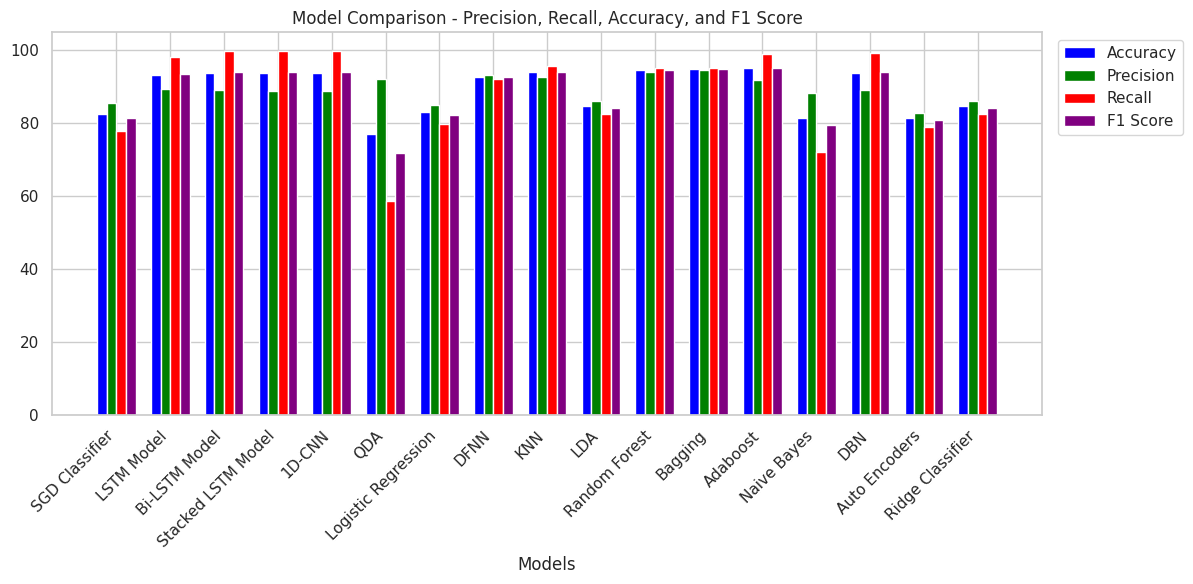

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of model names
model_names = ['SGD Classifier', 'LSTM Model', 'Bi-LSTM Model', 'Stacked LSTM Model', '1D-CNN', 'QDA', 'Logistic Regression', 'DFNN', 'KNN', 'LDA', 'Random Forest', 'Bagging', 'Adaboost', 'Naive Bayes', 'DBN', 'Auto Encoders', 'Ridge Classifier']

# Lists of corresponding model scores (replace with actual scores)
precision_scores = [precision_sgd, lstm_precision, bi_lstm_precision, stacked_lstm_precision, cnn_precision, qda_precision, lg_precision, dfnn_precision, knn_precision, lda_precision, rf_precision, bagging_classifier_precision, adaboost_classifier_precision, naive_bayes_classifier_precision, dbn_precision, classifier_precision, precision_ridge]
recall_scores = [recall_sgd, lstm_recall, bi_lstm_recall, stacked_lstm_recall, cnn_recall, qda_recall, lg_recall, dfnn_recall, knn_recall, lda_recall, rf_recall, bagging_classifier_recall, adaboost_classifier_recall, naive_bayes_classifier_recall, dbn_recall, classifier_recall, recall_ridge]
accuracy_scores = [acc_score_sgd, lstm_accuracy, bi_lstm_accuracy, stacked_lstm_accuracy, cnn_accuracy, qda_accuracy, lg_accuracy, dfnn_accuracy, knn_accuracy, lda_accuracy, rf_accuracy, bagging_classifier_accuracy, adaboost_classifier_accuracy, naive_bayes_classifier_accuracy, dbn_accuracy, classifier_accuracy, acc_score_ridge]
f1_scores = [f1_score_sgd, lstm_f1_score, bi_lstm_f1_score, stacked_lstm_f1_score, cnn_f1_score, qda_f1_score, lg_f1_score, dfnn_f1_score, knn_f1_score, lda_f1_score, rf_f1_score, bagging_classifier_f1_score, adaboost_classifier_f1_score, naive_bayes_classifier_f1_score, dbn_f1_score, classifier_f1_score, f1_score_ridge]

# Create a bar plot for model comparison
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Optional, for a white grid background

width = 0.18  # Width of each bar
x = np.arange(len(model_names))

plt.bar(x - 1.5 * width, accuracy_scores, width=width, label="Accuracy", color="blue")
plt.bar(x - 0.5 * width, precision_scores, width=width, label="Precision", color="green")
plt.bar(x + 0.5 * width, recall_scores, width=width, label="Recall", color="red")
plt.bar(x + 1.5 * width, f1_scores, width=width, label="F1 Score", color="purple")

# Set x-axis labels and title
plt.xlabel('Models')
plt.xticks(x, model_names, rotation=45, ha="right")
plt.title('Model Comparison - Precision, Recall, Accuracy, and F1 Score')

# Add a legend
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:


num_rows = len(df)


print(f'Number of Rows: {num_rows}')


for column in df.columns:
    data_type = df[column].dtype
    value_range = f'{df[column].min()} to {df[column].max()}'
    print(f'Feature: {column}, Type: {data_type}, Range: {value_range}')


Number of Rows: 15916
Feature: Average Time Interval, Type: float64, Range: -3.66548656822e-05 to 1414.0549208035713
Feature: Time Difference First-Last Packet, Type: float64, Range: -0.206037 to 79399.652131
Feature: Average Rate of Window Size Growth, Type: float64, Range: -10.25 to 0.9960787671232876
Feature: Average Rate of Sequence Number Increase, Type: float64, Range: -87646990.90178572 to 59947653.133928575
Feature: ACK Packets, Type: int64, Range: 0 to 16346
Feature: Average Packet Size, Type: float64, Range: 61.333333333333336 to 1097.6763925729442
Feature: RST Packets, Type: int64, Range: 0 to 6
Feature: TTL Standard Deviation, Type: float64, Range: 0.0 to 95.52042459679248
Feature: Time Since First Frame (seconds), Type: float64, Range: 2.3e-05 to 1650982820.905813
Feature: Total FIN Packets, Type: int64, Range: 0 to 8
Feature: Total URG Packets, Type: int64, Range: 0 to 0
Feature: Total PSH Packets, Type: int64, Range: 0 to 9943
Feature: avg_payload_len, Type: float64, Ran